i233090
Lab 2
SE_A

# Task 1

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_iris = sns.load_dataset("iris")
df_titanic = sns.load_dataset("titanic")
df_tips = sns.load_dataset("tips")
print(f"{df_iris.shape[0]} rows x {df_iris.shape[1]}")
print(df_iris.head())
print(df_iris.tail())
print(df_iris.info())
print(f"{df_titanic.shape[0]} rows x {df_titanic.shape[1]}")
print(df_titanic.head())
print(df_titanic.tail())
print(df_titanic.info())
print(f"{df_tips.shape[0]} rows x {df_tips.shape[1]}")
print(df_tips.head())
print(df_tips.tail())
print(df_tips.info())


150 rows x 5
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  

# Task 2

In [4]:
attribute_roles = {
    'sepal_length': 'Numerical Feature',
    'sepal_width': 'Numerical Feature',
    'petal_length': 'Numerical Feature',
    'petal_width': 'Numerical Feature',
    'species': 'Target Variable'
}
classification_table = pd.DataFrame(list(attribute_roles.items()), columns=['Attribute', 'Role'])
print(classification_table)

      Attribute               Role
0  sepal_length  Numerical Feature
1   sepal_width  Numerical Feature
2  petal_length  Numerical Feature
3   petal_width  Numerical Feature
4       species    Target Variable


# Task 3

In [37]:
missing_data = df_titanic.isnull().sum()
print(missing_data[missing_data > 0])
df_titanic['age'] = df_titanic ['age'].fillna(df_titanic['age'].mean())
df_titanic['embarked'] = df_titanic ['embarked'].fillna(df_titanic['embarked'].mode())
df_titanic.drop(columns=['deck'], inplace=True)

age            177
embarked         2
deck           688
embark_town      2
dtype: int64


# Task 4

In [38]:
print(f"{df_iris.shape[0]} rows x {df_iris.shape[1]}")
df_iris.duplicated().sum()
df_iris = df_iris.drop_duplicates()
print(f"{df_iris.shape[0]} rows x {df_iris.shape[1]}")
print(f"{df_titanic.shape[0]} rows x {df_titanic.shape[1]}")
df_titanic.duplicated().sum()
df_titanic = df_titanic.drop_duplicates()
print(f"{df_titanic.shape[0]} rows x {df_titanic.shape[1]}")
print(f"{df_tips.shape[0]} rows x {df_tips.shape[1]}")
df_tips.duplicated().sum()
df_tips = df_tips.drop_duplicates()
print(f"{df_tips.shape[0]} rows x {df_tips.shape[1]}")

150 rows x 5
149 rows x 5
891 rows x 14
780 rows x 14
244 rows x 7
243 rows x 7


# Task 5

In [40]:
df_mean_iris = df_iris.groupby('species').mean(numeric_only=True)
df_std_iris = df_iris.groupby('species').std(numeric_only=True)
print(df_mean_iris)
print(df_std_iris)

mean_titanic = df_titanic.groupby('survived')[['age', 'fare']].mean()
print(mean_titanic)

df_mean_tips = df_tips[['total_bill', 'tip']].mean()
df_median_tips = df_tips[['total_bill', 'tip']].median()
print(df_median_tips)
print(df_median_tips)


            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          5.006000     3.428000      1.462000     0.246000
versicolor      5.936000     2.770000      4.260000     1.326000
virginica       6.604082     2.979592      5.561224     2.028571
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          0.352490     0.379064      0.173664     0.105386
versicolor      0.516171     0.313798      0.469911     0.197753
virginica       0.632113     0.323380      0.553706     0.276887
                age       fare
survived                      
0         30.707298  24.026482
1         28.503682  50.194333
total_bill    17.81
tip            2.92
dtype: float64
total_bill    17.81
tip            2.92
dtype: float64


# Task 6

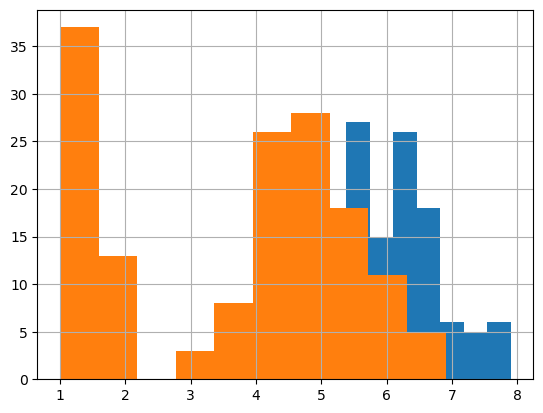

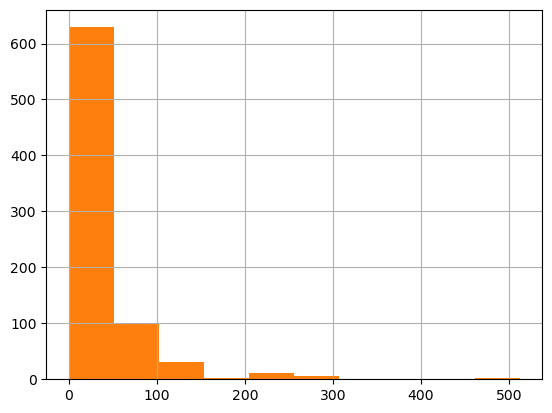

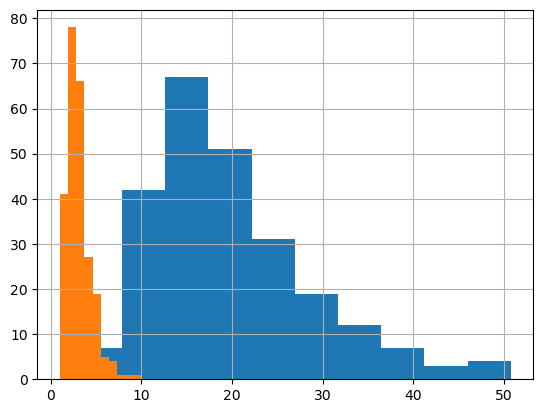

In [43]:
df_iris['sepal_length'].hist()
df_iris['petal_length'].hist()
plt.show()
df_titanic['age'].hist()
df_titanic['fare'].hist()
plt.show()
df_tips['total_bill'].hist()
df_tips['tip'].hist()
plt.show()

# Task 7

9
8


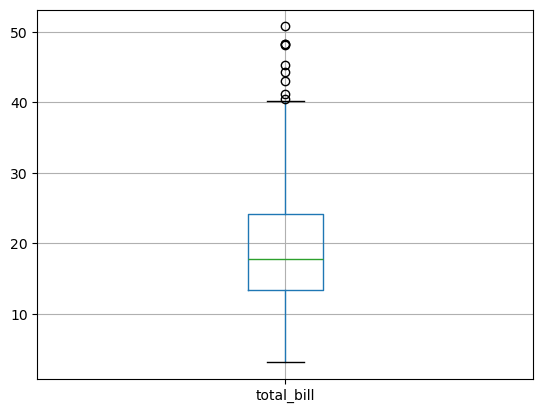

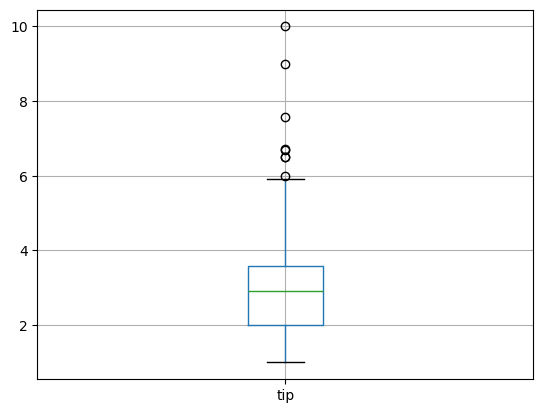

In [53]:
total_billQ1 = df_tips['total_bill'].quantile(0.25)
total_billQ3 = df_tips['total_bill'].quantile(0.75)
total_billIQR = total_billQ3 - total_billQ1
total_bill_lower_bound = total_billQ1 - 1.5 * total_billIQR
total_bill_upper_bound = total_billQ3 + 1.5 * total_billIQR

tipsQ1 = df_tips['tip'].quantile(0.25)
tipsQ3 = df_tips['tip'].quantile(0.75)
tipsIQR = tipsQ3 - tipsQ1
tips_lower_bound = tipsQ1 - 1.5 * tipsIQR
tips_upper_bound = tipsQ3 + 1.5 * tipsIQR

bill_outliers = df_tips[(df_tips['total_bill'] < total_bill_lower_bound) | (df_tips ['total_bill'] > total_bill_upper_bound)]
tip_outliers = df_tips[(df_tips['tip'] < tips_lower_bound) | (df_tips ['tip'] > tips_upper_bound)]

print(len(bill_outliers))
print(len(tip_outliers))


df_tips.boxplot(column=['total_bill'])
plt.show()
df_tips.boxplot(column=['tip'])
plt.show()



# Task 8

In [67]:
print (df_tips.shape)
df_cleaned_bill = df_tips[(df_tips['total_bill'] >= total_bill_lower_bound) & (df_tips['total_bill'] <= total_bill_upper_bound)]
print(df_cleaned_bill.shape)
df_cleaned_tips = df_tips[(df_tips['tip'] >= tips_lower_bound) & (df_tips['tip'] <= tips_upper_bound)]
print(df_cleaned_tips.shape)

(243, 7)
(234, 7)
(235, 7)


# Task 9

In [75]:
print(df_tips[['total_bill','tip']].mean())
print(df_tips[['total_bill','tip']].median())
print(df_tips[['total_bill','tip']].std())

print(df_cleaned_tips[['total_bill','tip']].mean())
print(df_cleaned_tips[['total_bill','tip']].median())
print(df_cleaned_tips[['total_bill','tip']].std())

total_bill    18.546856
tip            2.823450
dtype: float64
total_bill    17.29
tip            2.72
dtype: float64
total_bill    7.237151
tip           1.103217
dtype: float64
total_bill    19.191064
tip            2.853489
dtype: float64
total_bill    17.47
tip            2.75
dtype: float64
total_bill    8.192044
tip           1.117249
dtype: float64
